Before running this notebook, ensure that `PointCloud2` topic is published and `/pc2depth_server/pc2depth_service` is ready. When testing on gazebo:

```
$ roslaunch o2as_gazebo o2as_gazebo.launch

# Run service server in another terminal
$ rosrun o2as_pc2depth test_pc2depth_node
```

Currently, the service server assumes the topic name `/b_bot_camera/depth/points`. See `test_pc2depth.py`.

img.shape = (480, 640)


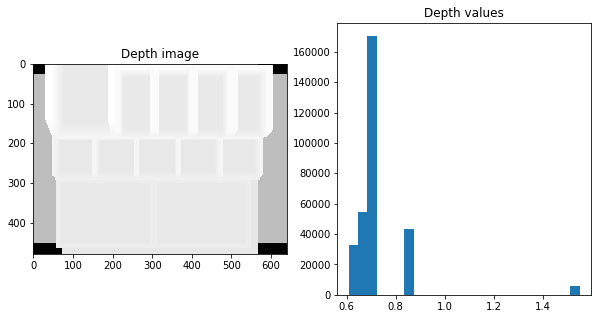

In [45]:
%matplotlib inline
from cv_bridge import CvBridge, CvBridgeError
import matplotlib.pyplot as plt
from test_pc2depth import get_depth_image

bridge = CvBridge()

res = get_depth_image()
img = bridge.imgmsg_to_cv2(res.image, "32FC1")
print("img.shape = {}".format(img.shape))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, interpolation='none', cmap='gray_r')
plt.title('Depth image')
plt.subplot(1, 2, 2)
plt.hist(img.reshape(-1), bins=25);
plt.title('Depth values');